# Objective
In this project, we focused on leveraging advanced statistical techniques to develop a predictive algorithm for classifying health-related conditions. By rigorously analyzing and preprocessing the dataset, we aimed
to Improve the accuracy of the logistic regression model for early detection of malignant tumors in medical data to achieve at least 98% accuracy, 95% sensitivity, and 100% precision by implementing feature selection, data preprocessing, and adjusting the decision threshold, aiming to significantly impact patient outcomes in the medical field within the next three months.
### Dataset
The dataset used for model training contains 569 cases of breast cancer tumors, each characterized by 32 attributes. These attributes encompass a wide range of tumor properties, from basic geometric measurements like radius and perimeter to more intricate features such as concavity and texture. Our objective was to harness the power of logistic regression to distinguish between benign and malignant tumors with a high degree of accuracy. By meticulously preprocessing the data and applying advanced analytical techniques, we aimed to develop a model that could significantly contribute to early cancer detection and diagnosis.

**LIC. DAVID GUTIÉRREZ, 08/04/2024**

# **Part 1**. EDA
Exploratory Data Analysis involves understanding the structure of the data, identifying patterns and detecting outliers.

1.
1.   Loading Dataset
2.   Understanding the Data
3.   Statistical Summary
4.   Data Visualization
5.   Correlation Analysis





# 1.1 Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestría en Inteligencia Artificial Aplicada (MNA)/Ciencia y analítica de datos (Gpo 10)/Semana 9"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_df.set_index('id', inplace=True)
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# 1.2 Understanding the data

In [ ]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

# 1.3 Statistical Summary

In [ ]:
unique_values = data_df.nunique()
unique_values

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
missing_values = data_df.isnull().sum()
missing_values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
frecuencias_diagnosis = data_df['diagnosis'].value_counts().sum()
frecuencias_diagnosis

569

# 1.4 Visualización de datos

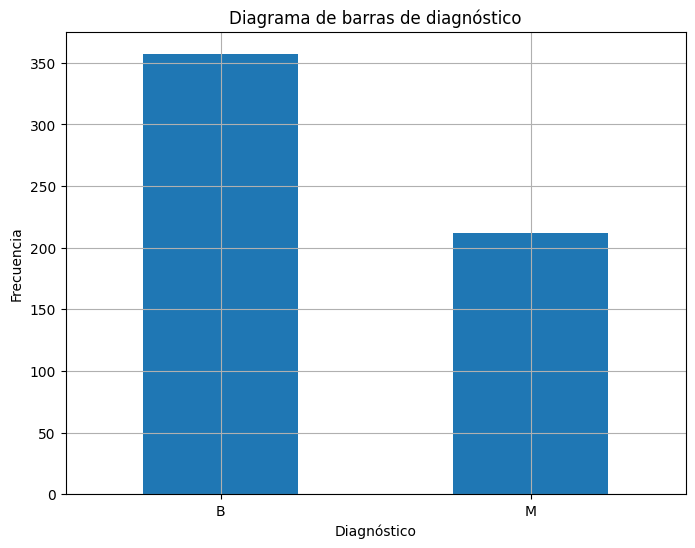

In [ ]:
diagnosis_counts= data_df["diagnosis"].value_counts()

plt.figure(figsize=(8,6))
diagnosis_counts.plot(kind="bar")
plt.title(f"Diagrama de barras de diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid()
plt.show()

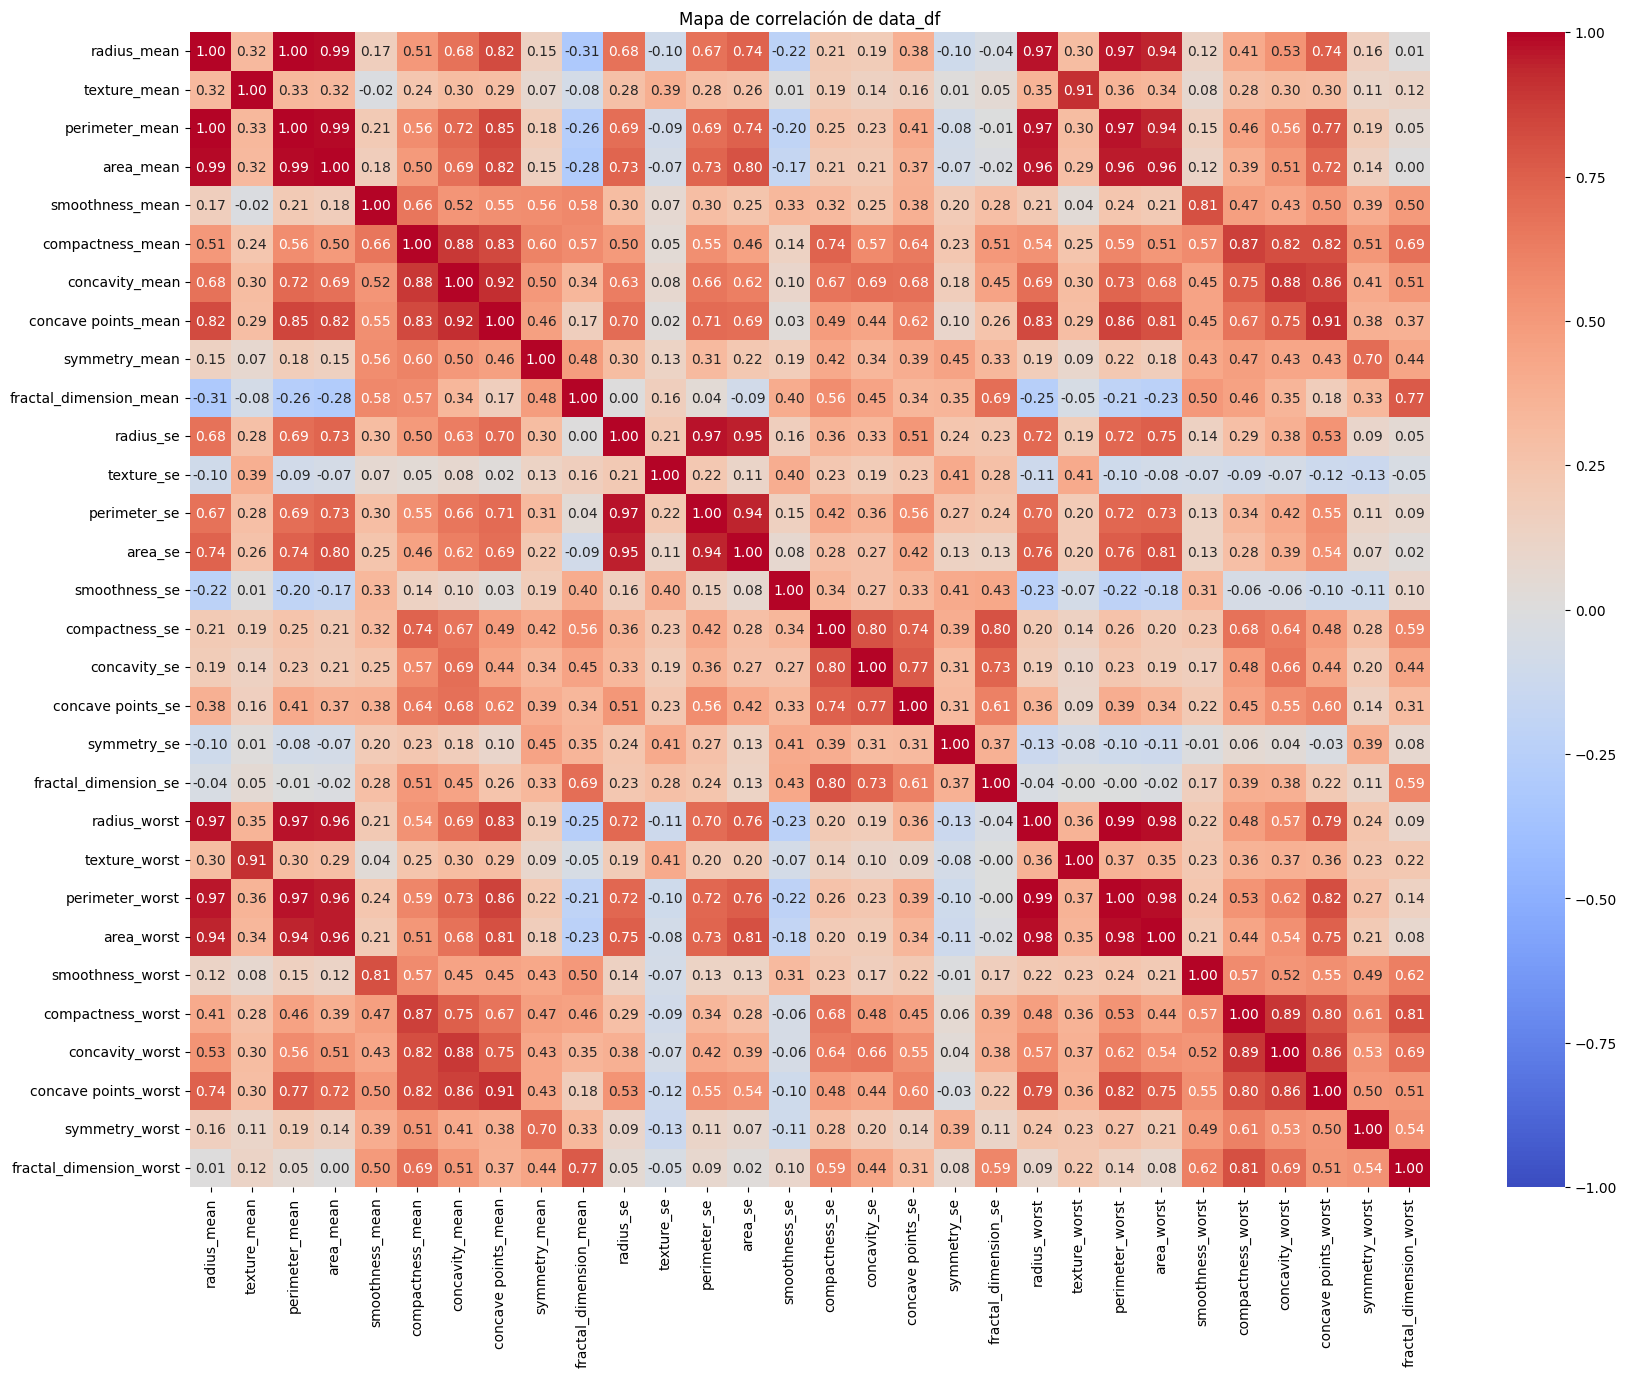

In [ ]:
correlation_matrix = data_df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de correlación de data_df')
plt.show()

## 1.5 Correlation Analysis

In [ ]:
column_worst = [col for col in data_df.columns if '_worst' in col]
data_df2 = data_df.drop(columns=column_worst)
column_worst

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
data_df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892


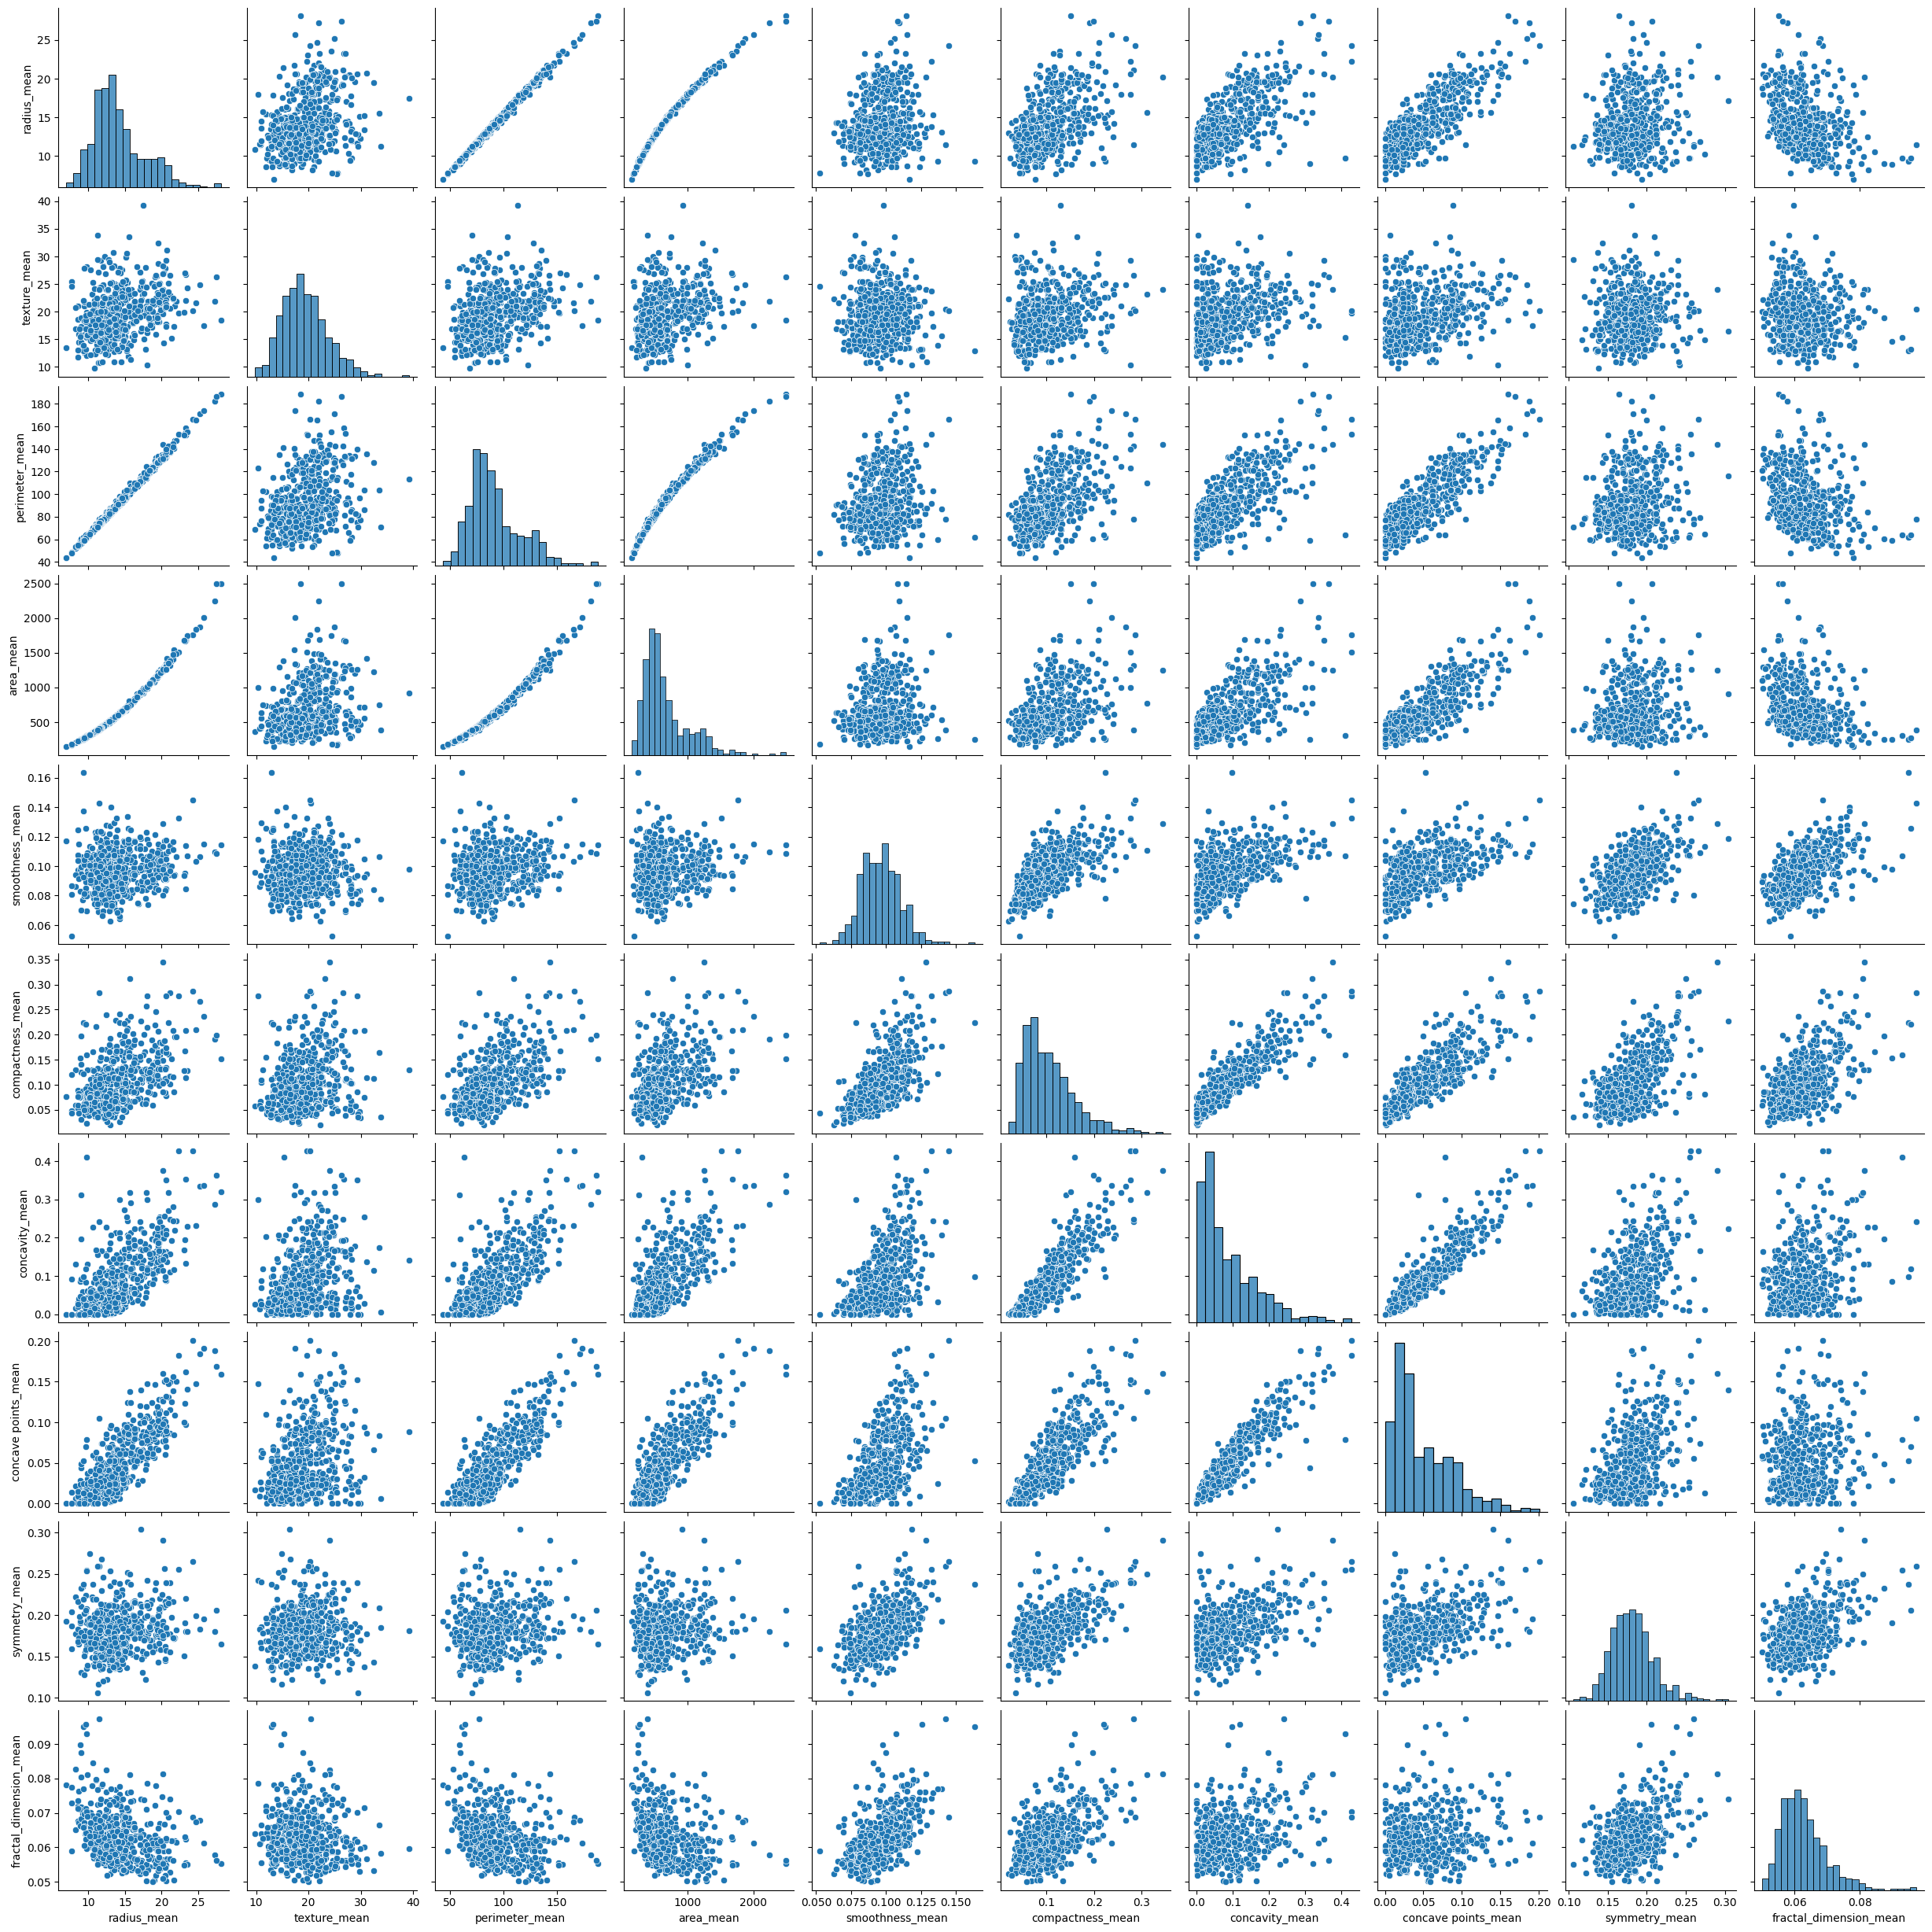

In [ ]:
mean_columns = [col for col in data_df2 if '_mean' in col]
sns.pairplot(data=data_df2[mean_columns])
plt.show()

In [ ]:

variables_to_remove = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']

data_corrected = data_df2.drop(columns=variables_to_remove)

data_corrected

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


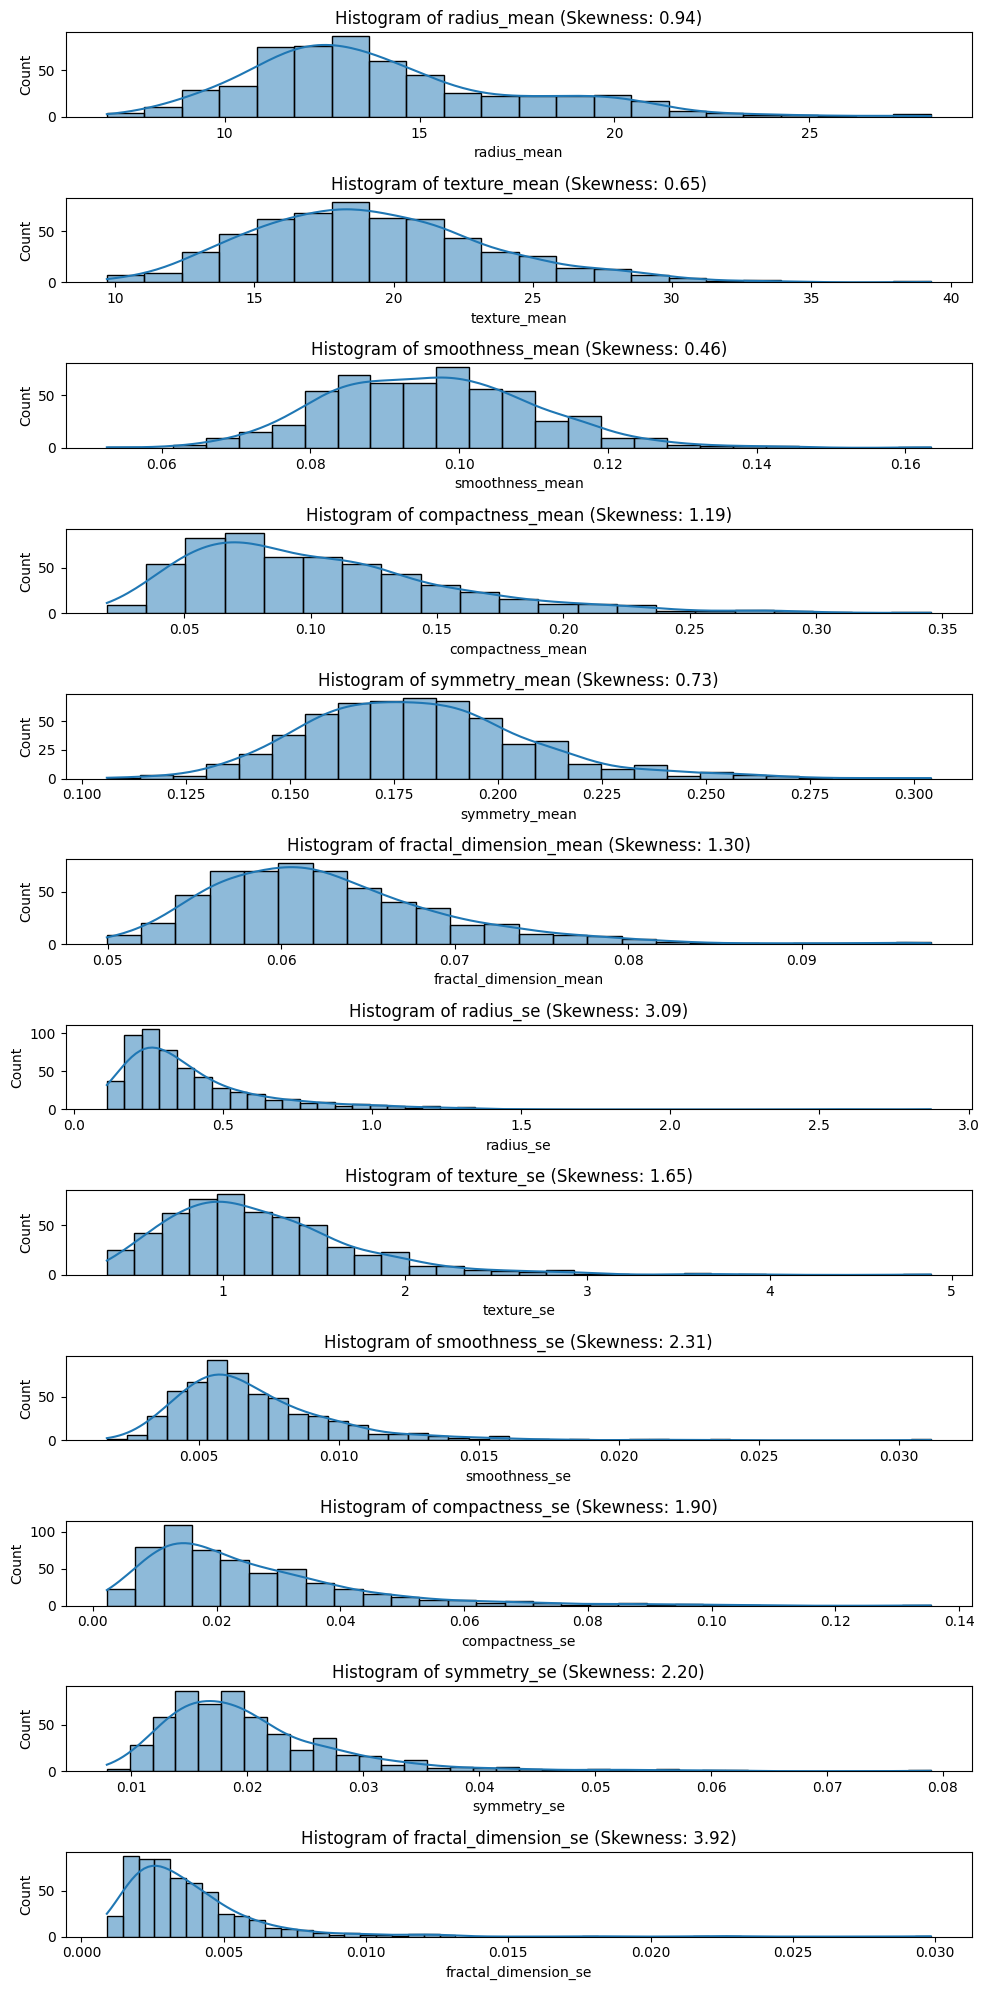

In [ ]:
num_rows= len(data_corrected.columns) - 1
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 20))
for ax, col in zip(axes, data_corrected.drop('diagnosis', axis=1).columns):
    sns.histplot(data_corrected[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col} (Skewness: {data_corrected[col].skew():.2f})')
plt.tight_layout()
plt.show()

In [ ]:
skewness = data_corrected.skew(numeric_only=True)
skew_cols = skewness[skewness >1].index.tolist()
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

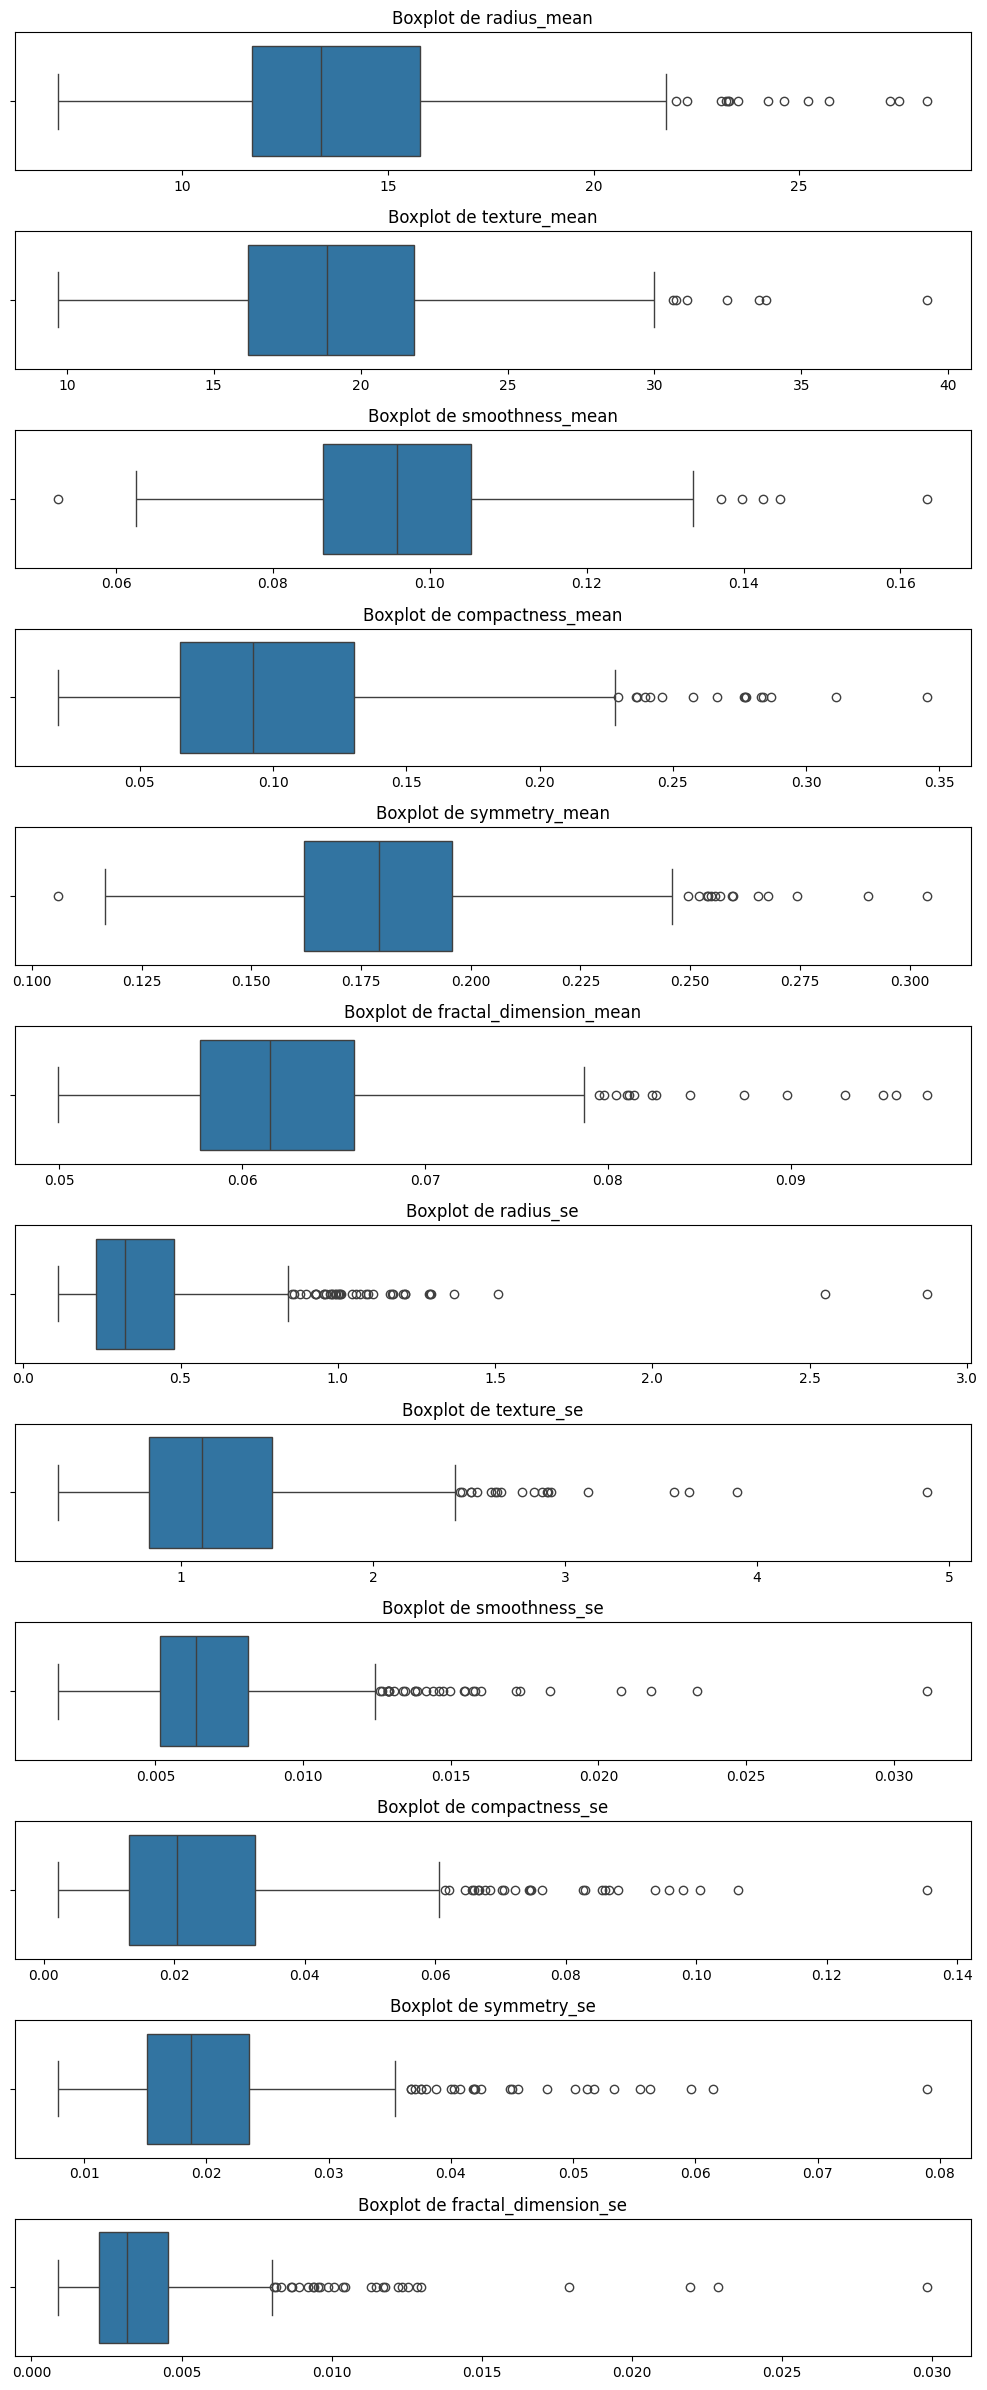

In [ ]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10,2*num_rows))
for ax, col in zip(axes, data_corrected.columns[1:]):
  sns.boxplot(x=data_corrected[col], ax=ax)
  ax.set_title(f"Boxplot de {col}")
  ax.set_xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
scale_cols = [col for col in data_corrected.columns
              if col!='diagnosis' and (data_corrected[col].min() < 0 or data_corrected[col].max() > 1)]
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

# Part 2. Model building and Evaluation



In [ ]:
from sklearn.model_selection import train_test_split
data_model_df = pd.read_csv('data.csv')
data_model_df.set_index("id",inplace=True)
X = data_model_df.drop('diagnosis', axis=1)
y = data_model_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

column_18_drop = [ 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
    'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst',
    'texture_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst',
    'fractal_dimension_worst', 'radius_worst'
]

preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', column_18_drop)
        ]
    ,remainder='passthrough')
preprocessing.fit_transform(X_train).shape

(455, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

logr_model= Pipeline(steps=[('preprocessing', preprocessing),
                               ('classifier', LogisticRegression(random_state=1))
])
logr_model.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=["B","M"])
recall = recall_score(y_test, y_pred, pos_label="M")
precision = precision_score(y_test, y_pred, pos_label="M")
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
conf_matrix, recall, precision, accuracy

(array([[68,  4],
        [10, 32]]),
 0.7619047619047619,
 0.8888888888888888,
 0.8771929824561403)

# Mátriz de confusión del Modelo Inicial
Este modelo solamente utiliza un preprocesamiento donde elimina la alta relación lineal entre variables
*  **68** predicciones de  Verdaderos Negativos: correctamente identificados.
*    **4** predicciones falsas positivas: incorrectamente clasificados
*   **10** falsos negativos: incorrectamente identificados como beningos
*   **32** verdaderos positivos: Correctamente identificados.


#Sensibilidad o Recall
Aproximadamente 76.2 % de los tumores fueron correctamente identificados como tumores malignos.

# Precisión / Precision
88.9% de las predicciones clasificadas como malignas, efectivamente eran malignas.

# Exactitud / Accuracy
Significa que el modelo hizo la predicción correcta para el 87.8% de los  tumores



In [ ]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
sqrt_transformer= FunctionTransformer(func=np.sqrt, check_inverse=False, validate=False)
minmax_scaler = MinMaxScaler()

preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', column_18_drop),
        ('sqrt_transform', sqrt_transformer, skew_cols),
        ('minmax_scale', minmax_scaler, scale_cols),
    ],
    remainder='passthrough'
)

preprocessing2.fit_transform(X_train).shape

(455, 14)

In [ ]:
logr_model2= Pipeline(steps=[('preprocessing2', preprocessing2),
                               ('classifier', LogisticRegression(random_state=1))
])
logr_model2.fit(X_train, y_train)
y_pred2 = logr_model2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=["B","M"])
recall2 = recall_score(y_test, y_pred2, pos_label="M")
precision2 = precision_score(y_test, y_pred2, pos_label="M")
accuracy2 = accuracy_score(y_test, y_pred2)

# Mátriz de confusión del segundo modelo
Este modelo de regresión lógistica, a diferencia del modelo inicial, es procesado utilizando la raíz cuadrada y un escalamiento MinMax a las variables con sesgo y aquellas variables que distorsionan la escala entre 0 y 1, además de eliminar las 18 columnas con alta correlación

*  **72** predicciones de  Verdaderos Negativos
*   **0** predicciones de falsas positivas
*   **11** predicciones de falsos negativos
*   **31** predicciones de verdaderos positivos


#Sensibilidad o Recall
Aproximadamente 73.8% de los tumores fueron correctamente identificados como tumores malignos.

# Precisión / Precision
100% de las predicciones clasificadas como malignas, efectivamente eran malignas.

# Exactitud / Accuracy
Significa que el modelo hizo la predicción correcta para el 90.4% de los  tumores



In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(569, 30)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca.shape
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_comp_99 = np.where(cumulative_variance >= 0.99)[0][0]+1
num_comp_99

17

In [ ]:
logr_model3= Pipeline(steps=[('scaler', StandardScaler()),
                              ('pca', PCA(n_components=num_comp_99)),
                             ('classifier', LogisticRegression(random_state=1))
])
logr_model3.fit(X_train, y_train)
y_pred3 = logr_model3.predict(X_test)
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=["B","M"])
recall3 = recall_score(y_test, y_pred3, pos_label="M")
precision3 = precision_score(y_test, y_pred3, pos_label="M")
accuracy3 = accuracy_score(y_test, y_pred3)

In [ ]:
conf_matrix3, recall3, precision3, accuracy3

(array([[72,  0],
        [ 2, 40]]),
 0.9523809523809523,
 1.0,
 0.9824561403508771)

# Mátriz de confusión del Tercer modelo
Este modelo de regresión lógistica, a diferencia del segundo modelo, es procesado utilizando un escalamiento estandar para poder aplicar PCA, utilizando solo las columnas que explican el 99% de la variancia.

*  **72** predicciones de  Verdaderos Negativos
*   **0** predicciones de falsas positivas
*   **2** predicciones de falsos negativos
*   **40** predicciones de verdaderos positivos


#Sensibilidad o Recall
Aproximadamente 95.2% de los tumores fueron correctamente identificados como tumores malignos.

# Precisión / Precision
100% de las predicciones clasificadas como malignas, efectivamente eran malignas.

# Exactitud / Accuracy
Significa que el modelo hizo la predicción correcta para el 98.2% de los  tumores

